<a href="https://colab.research.google.com/github/doggest25/machine_learning/blob/main/week%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # PRAKTIKUM 1

Klasifikasi SVM dengan Data Dummy

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

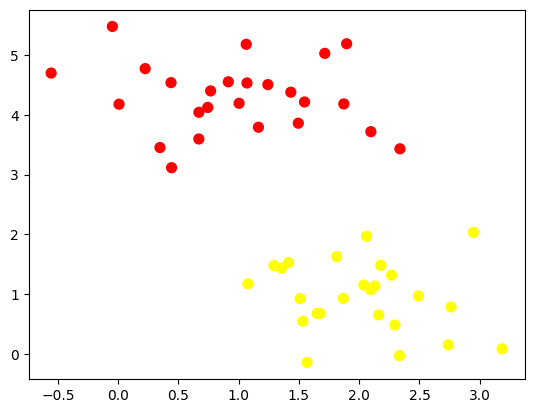

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

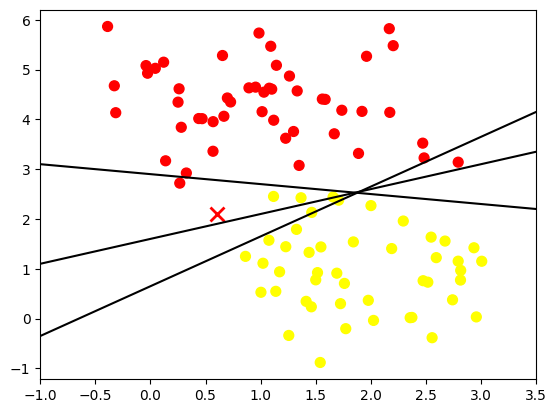

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

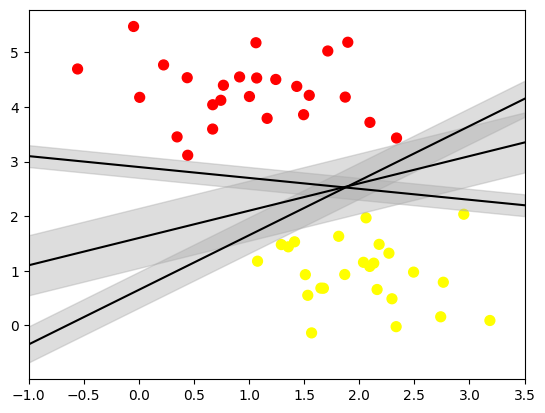

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

**Penerappan fitting SVM**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

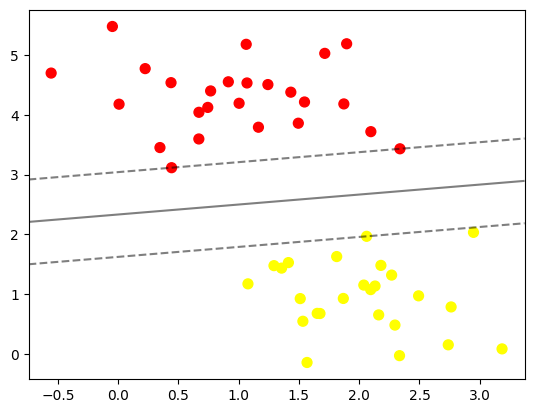

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

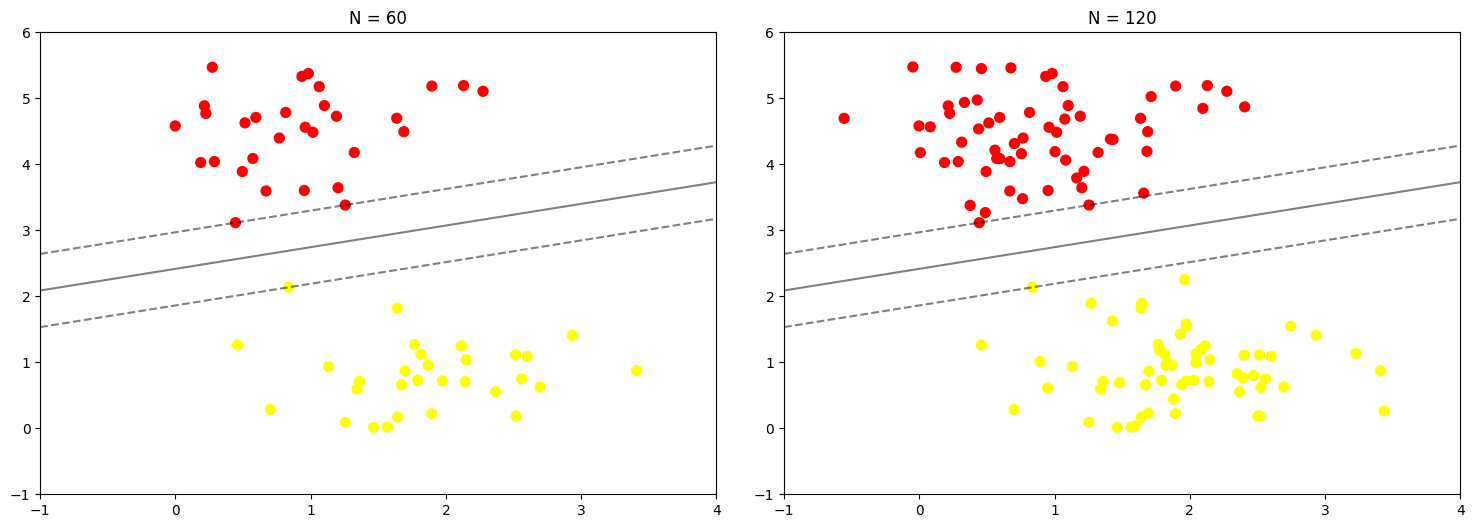

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Data Tidak Terpisah Secara Linier

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

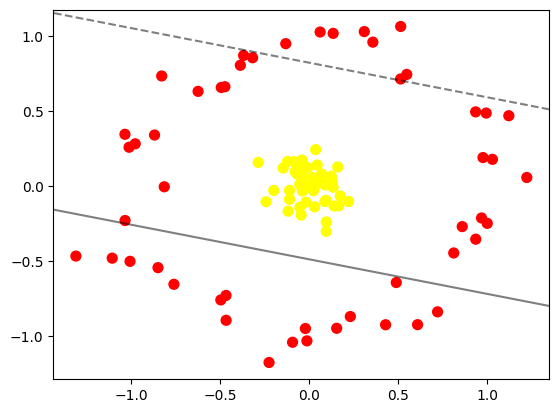

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [ ]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 3.78585628,  1.96688602],
       [ 1.1372926 ,  0.54740762],
       [-0.02596621,  4.92577961],
       [ 0.26604148,  2.71915015],
       [ 3.00569136,  1.15121775],
       [ 1.34880003,  3.07479238],
       [ 1.01287689,  4.15404025],
       [ 3.59362114,  2.08207549],
       [ 0.66640862,  4.06194513],
       [ 1.41253979,  0.34602384],
       [ 0.69794036,  4.4288665 ],
       [ 1.75992205,  0.70616032],
       [ 1.14289006,  5.08509856],
       [ 0.25043139,  4.34534364],
       [ 1.84086482,  1.53962878],
       [ 3.96178334,  1.65324725],
       [ 2.95657626,  0.03371845],
       [ 0.43830172,  4.0161448 ],
       [ 1.00254159,  0.52839598],
       [ 1.43933466,  1.32906301],
       [ 1.10022802,  4.60631734],
       [ 0.72702805,  4.3487196 ],
       [ 1.46361712,  2.13207534],
       [ 0.04415021,  5.02444852],
       [ 2.47388885,  0.76042659],
       [ 0.893695  ,  4.63226613],
       [ 1.45946366,  0.23651283],
       [ 0.9846701 ,  5.73248372],
       [ 1.33136066,  4.57072679],
       [ 2.29385806,  1.95877238],
       [ 2.35640795,  0.01814303],
       [ 1.02948386,  4.54576485],
       [ 1.17176085,  0.93939572],
       [ 2.37207289,  0.02321445],
       [ 1.70714468,  2.37707464],
       [ 1.91929374,  4.15984746],
       [ 1.51580139,  0.92312811],
       [ 2.00067424,  2.26833784],
       [ 1.88779063,  3.31592667],
       [ 0.86226145,  1.24917702],
       [ 0.13742771,  3.16777298],
       [ 2.20249345,  5.47927434],
       [-0.38874607,  5.86440764],
       [ 1.29814339,  3.75593925],
       [ 1.1167688 ,  2.45256061],
       [ 2.18860632,  1.40568881],
       [ 2.02384127, -0.03681114],
       [ 1.77207239, -0.20229737],
       [-0.3278886 ,  4.67401313],
       [ 0.65372852,  5.28174338],
       [ 1.9765055 ,  0.36688103],
       [ 1.02098199,  1.11130436],
       [ 2.16687183,  5.82049867],
       [ 1.2613632 ,  4.86904586],
       [ 2.79207378,  3.14029479],
       [ 1.07779975,  4.62537882],
       [ 2.48279064,  3.22558008],
       [ 1.69084152,  0.91164699],
       [ 2.79195458,  1.15264578],
       [ 2.55545268, -0.38398246],
       [ 1.54659066,  1.4388103 ],
       [ 1.73634081,  4.18270156],
       [ 0.11966798,  5.14734871],
       [ 2.59310333,  1.22363313],
       [ 1.09150494,  5.46720613],
       [ 1.65684156,  2.4412893 ],
       [ 0.27963236,  3.8407076 ],
       [ 2.47031647,  3.52196502],
       [ 2.9349952 ,  1.42187464],
       [ 1.66781904,  3.71005531],
       [ 1.22672424,  3.62051074],
       [ 1.72437234,  0.29969981],
       [ 3.54931469,  1.62249939],
       [ 1.55954253,  4.40697366],
       [ 0.32575305,  2.92276125],
       [ 0.4688124 ,  4.01359439],
       [ 1.22787325,  1.44293927],
       [ 2.54653102,  1.635429  ],
       [ 0.56854833,  3.95332789],
       [ 0.9537243 ,  4.64645282],
       [ 1.36628697,  2.42571562],
       [ 1.11821099,  3.98236258],
       [-0.04011792,  5.07930469],
       [ 1.58510026,  4.40112734],
       [ 0.56762597,  3.35928158],
       [ 0.25989683,  4.61330933],
       [ 2.8130691 ,  0.77365559],
       [ 1.96050262,  5.26569121],
       [ 1.49961323,  0.77795603],
       [ 2.51654017,  0.73102466],
       [ 2.67269996,  1.55646698],
       [ 2.74073201,  0.37684319],
       [ 1.32500974,  1.79127669],
       [ 1.25509524, -0.33815322],
       [ 2.17153334,  4.13966072],
       [-1.06612177,  4.8266822 ],
       [ 1.5403728 , -0.88105886],
       [ 2.81480417,  0.96770465],
       [-0.3148482 ,  4.1335951 ],
       [ 1.07491911,  1.57315404]]), y=array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1]))>

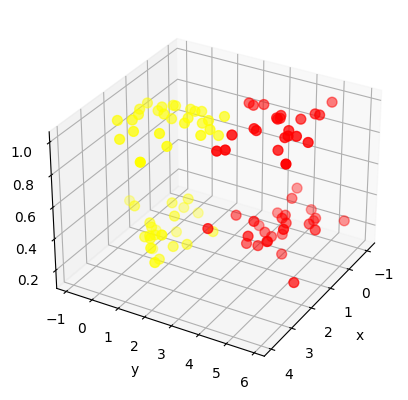

In [ ]:

from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

# Assuming X, y, and r are already defined

def plot_3D(elev=30, azim=30, X=X, y=y):  # Corrected azim parameter name
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180), # Corrected azim parameter name
         X=fixed(X), y=fixed(y))

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

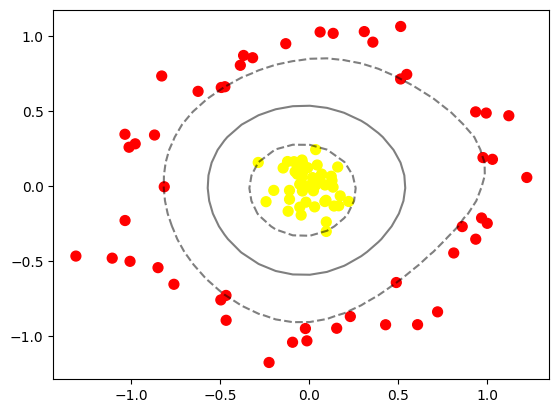

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

**Data Overlap**

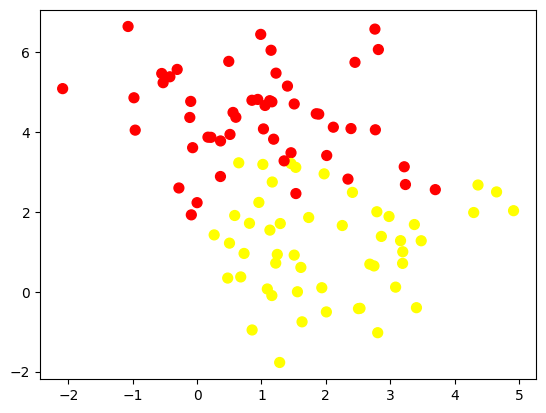

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

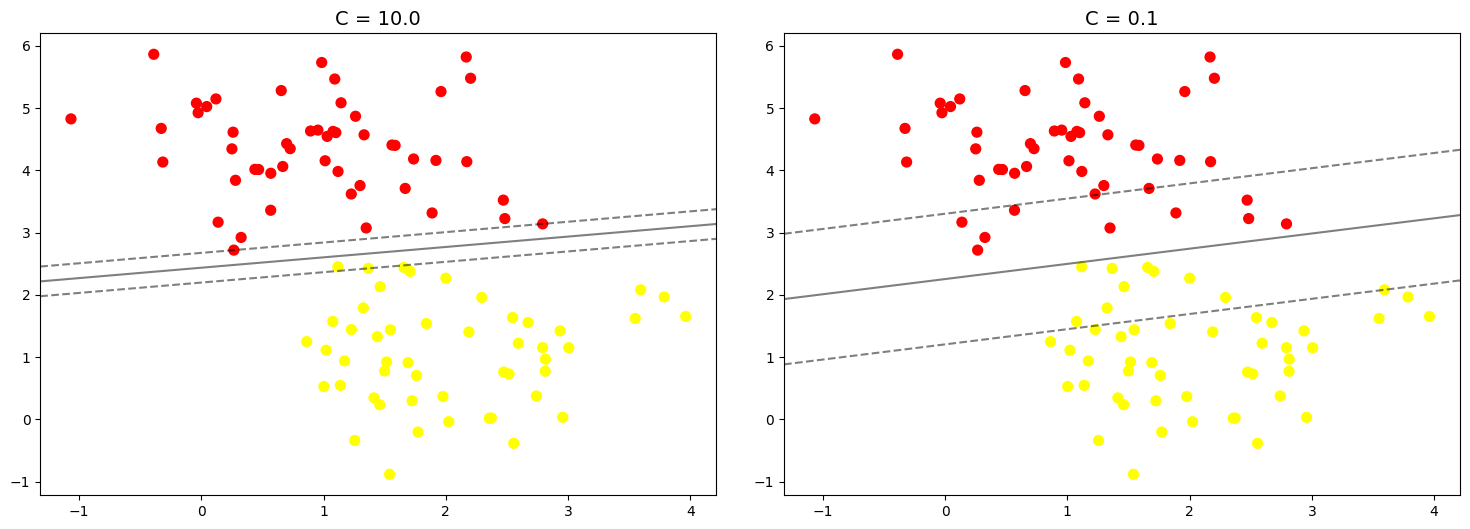

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Perlu diperhatikan bahwa nila optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)

# PRAKTIKUM 2

dataset yang digunakan adalah Labeled Faces in the Wild dataset (sebuah dataset yang berisi ribuan wajah publik figur).

Link dataset: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


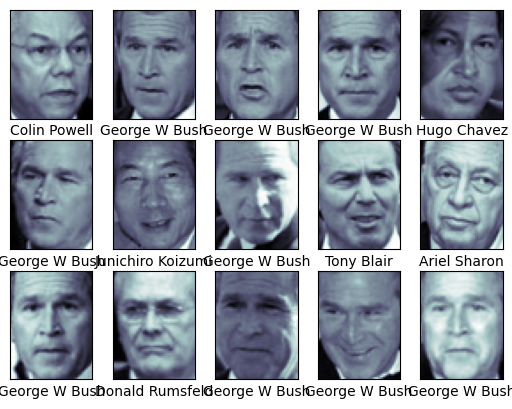

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 40s, sys: 26.8 s, total: 2min 7s
Wall time: 1min 25s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


prediksi label untuk data testing

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

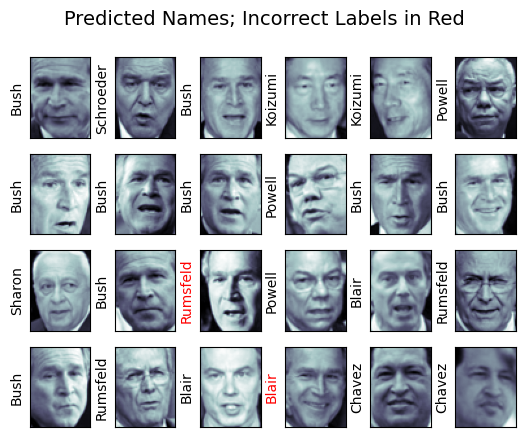

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

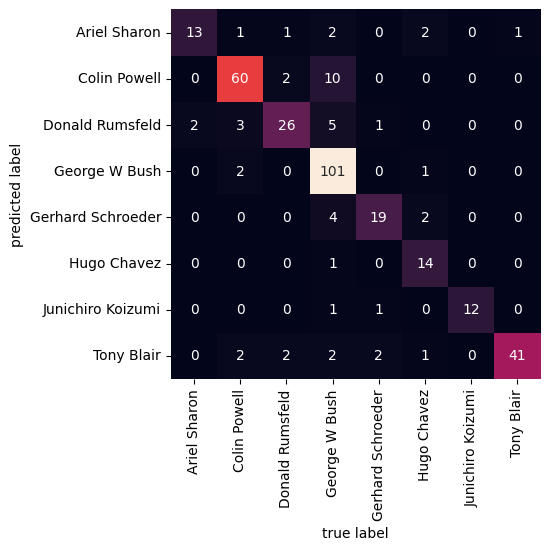

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# PRAKTIKUM 5

**Langkah 0 - Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python

In [3]:
# Image directories
train_dir = "/content/drive/MyDrive/images/training/"
test_dir = "/content/drive/MyDrive/images/test/"

**Langkah 1 - Load Data dan Visualisasikan**

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [4]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training

In [5]:
# Load training data
train_img = load_dataset(train_dir)

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

Copy


In [6]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[  5,   5,   5],
         [  4,   4,   4],
         [  2,   2,   2],
         ...,
         [  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3]],
 
        [[  4,   4,   4],
         [  4,   4,   4],
         [  2,   2,   2],
         ...,
         [  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3]],
 
        [[  4,   4,   4],
         [  3,   3,   3],
         [  3,   3,   3],
         ...,
         [  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3]],
 
        ...,
 
        [[226, 255, 255],
         [186, 217, 222],
         [188, 218, 228],
         ...,
         [ 15,  15,   7],
         [ 18,  18,  10],
         [ 17,  17,   9]],
 
        [[220, 251, 254],
         [179, 210, 215],
         [179, 209, 219],
         ...,
         [ 21,  21,  13],
         [ 23,  23,  15],
         [ 20,  20,  12]],
 
        [[207, 238, 241],
         [167, 198, 203],
         [166, 196, 206],
         ...,
         [ 26,  26,  18],
  

Cek ukuran gambar secara acak

In [7]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 136
(469, 640, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [8]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Lakukan visualisasi gambar secara acak

Shape	: (531, 800, 3)
Label	: night


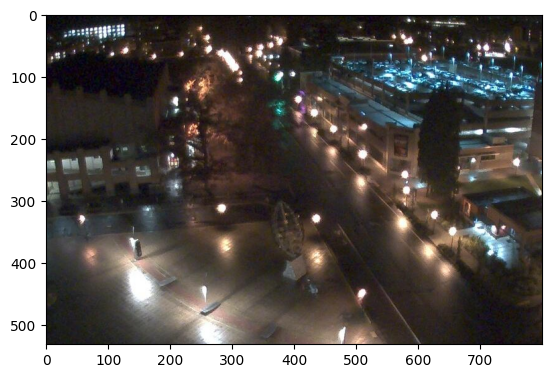

In [ ]:
random_img_viz(train_img)

**Langkah 3 - Pra Pengolahan Data**

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar

In [9]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label

In [10]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [11]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Lakukan pra pengolahan data pada data training.

In [12]:
train_std_img_list = preprocess(train_img)

Lakukan pengecekan ukuran gambar secara acak

In [13]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 157
(600, 1100, 3)


**WARNING!** Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Shape	: (600, 1100, 3)
Label	: 1


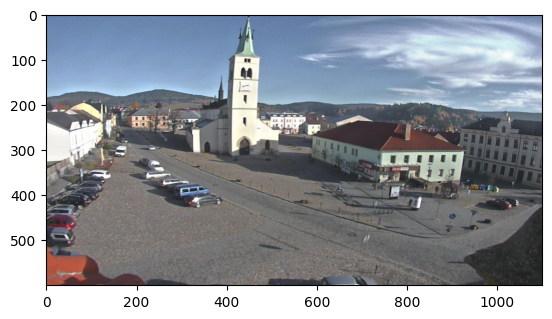

In [14]:
random_img_viz(train_std_img_list)

**Langkah 4 - Ekstraksi Fitur**

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan



In [15]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Lakukan pengecekan pada gambar secara acak.** INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!**

Image 35
Avg Brighness: 111.4930


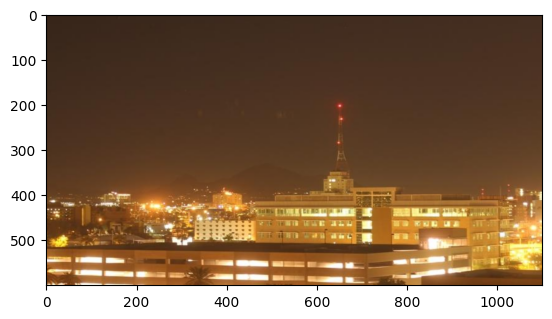

In [16]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

**Langkah 5 - Klasifikasi dengan Metode Threshold**

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [17]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Lakukan pengecekan prediksi secara acak pada data training

Image 14
Actual label: 0
Predicted label: 0


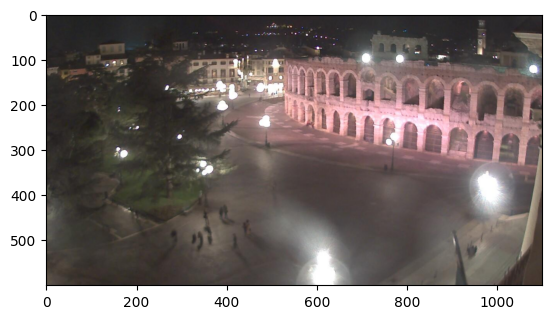

In [18]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

**Langkah 6 - Evaluasi (Manual)**

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

Buatlah fungsi berikut,

In [19]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Lakukan evaluasi pada data training dengan nilai ambang batas 120

In [20]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [21]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


**Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM**
Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

Langkah 4 alternatif - Membuat Feature Vectors
Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

**Langkah 4 alternatif - Membuat Feature Vectors**

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

In [22]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

Cek hasilnya pada data training,

In [24]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,90.655914,0.0
1,113.663214,0.0
2,26.067339,0.0
3,109.456177,0.0
4,99.133724,0.0


Lakukan langkah yang serupa pada data testing

In [25]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,54.137088,0.0
1,94.067308,0.0
2,73.073691,0.0
3,110.777865,0.0
4,19.332556,0.0


**Langkah 5 alternatif**

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [26]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

**Langkah 6 alternatif**

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [27]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# TUGAS 2

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [28]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [29]:
# Fungsi untuk mengekstrak histogram warna dari sebuah gambar
def extract_histogram(image_path, bins=(8, 8, 8)):
    # Membaca gambar dari path yang diberikan
    image = cv2.imread(image_path)
    # Mengubah gambar dari format BGR (OpenCV default) ke RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Menghitung histogram warna untuk ketiga channel RGB
    # bins menentukan berapa banyak kotak interval untuk setiap warna (misalnya 8 interval untuk tiap channel)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    # Normalisasi histogram untuk membuat distribusi lebih seragam
    cv2.normalize(hist, hist)
    # Flatten (ubah menjadi 1 dimensi) histogram untuk dijadikan fitur
    return hist.flatten()


In [30]:
# Fungsi untuk memuat gambar dan mengekstrak fitur histogram serta labelnya
def load_data(image_dir):
    features = []
    labels = []
    # Melakukan iterasi untuk setiap subdirektori (kelas) di dalam direktori gambar
    for label in os.listdir(image_dir):
        label_path = os.path.join(image_dir, label)
        # Memastikan bahwa label_path adalah sebuah folder (subdirektori)
        if os.path.isdir(label_path):
            # Melakukan iterasi untuk setiap file gambar dalam subdirektori
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                # Mengecek apakah file berformat gambar (png, jpg, jpeg)
                if img_file.endswith(('.png', '.jpg', '.jpeg')):
                    # Ekstrak histogram dari gambar
                    hist = extract_histogram(img_path)
                    # Menambahkan histogram sebagai fitur
                    features.append(hist)
                    # Menambahkan nama subdirektori sebagai label (kelas) gambar
                    labels.append(label)
    # Mengembalikan fitur dan label dalam bentuk numpy array
    return np.array(features), np.array(labels)

In [31]:
# Memuat data latih dari direktori training
train_features, train_labels = load_data(train_dir)

In [32]:
# Melatih model SVM dengan kernel linear berdasarkan fitur dan label latih
model = svm.SVC(kernel='linear', probability=True)
model.fit(train_features, train_labels)

SVC(kernel='linear', probability=True)

In [33]:
# Memuat data uji dari direktori test
test_features, test_labels = load_data(test_dir)

In [34]:
# Melakukan prediksi pada data uji menggunakan model yang telah dilatih
predictions = model.predict(test_features)


In [35]:
# Menampilkan akurasi dari prediksi model
print("Accuracy:", accuracy_score(test_labels, predictions))

Accuracy: 0.94375


In [36]:
# Menampilkan laporan klasifikasi yang berisi precision, recall, F1-score, dll.
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

         day       1.00      0.89      0.94        80
       night       0.90      1.00      0.95        80

    accuracy                           0.94       160
   macro avg       0.95      0.94      0.94       160
weighted avg       0.95      0.94      0.94       160

